In [1]:
import gym_bandits
import gym
import numpy as np

In [2]:
env = gym.make("BanditTenArmedGaussian-v0")

[2020-03-27 20:24:44,775] Making new env: BanditTenArmedGaussian-v0
/home/aims/anaconda3/envs/universe/lib/python3.6/site-packages/gym/envs/registration.py:18: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


## The epsilon - greedy policy

In [3]:
# Let first initialize all the variables

num_rounds = 20000

count = np.zeros(env.n_bandits)

sum_rewards = np.zeros(env.n_bandits)

Q = np.zeros(env.n_bandits)

In [4]:
# Now we define our epsilon-greedy function

def epsilon_greedy(epsilon):
    rand = np.random.random()
    if rand < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q)
    return action

In [5]:
# Start pulling the arm
for i in range(num_rounds):
    # Select the arm using epsilon greedy
    arm = epsilon_greedy(0.5)
    # Get the rewards
    observation, reward, done, info = env.step(arm)
    # Update the count of that arm
    count[arm] +=1 
    #Sum the rewards obtained from that arm
    sum_rewards[arm] +=reward
    #Calculate the Q value which is the average rewards of the arm
    Q[arm] = sum_rewards[arm]/count[arm]
print('The optimal arm is {}'.format(np.argmax(Q)))

The optimal arm is 4


## The Softmax exploration algorithm

in this softmax algorithm we must specify the value of the temparature factor noted as $\tau$. It specifies how many random arms we can explore. When $\tau$ is high, all the arms will be explored equally, but when it is low, only high-rewardin arms will be chosen.

In [6]:
# Let first initialize all the variables

num_rounds = 20000

count = np.zeros(env.n_bandits)

sum_rewards = np.zeros(env.n_bandits)

Q = np.zeros(env.n_bandits)

In [7]:
# Now we define the softmax algorithm

def softmax(tau):
    total = sum([np.exp(val/tau) for val in Q])
    probs = [np.exp(val/tau)/total for val in Q]
    threshold = np.random.random()
    cumulative_prob = 0.0
    for i in range(len(probs)):
        cumulative_prob += probs[i]
        if (cumulative_prob > threshold):
            return i
    return np.argmax(probs)

In [8]:
# Start pulling the arm
for i in range(num_rounds):
    # Select the arm using softmax
    arm = softmax(0.5)
    # Get the rewards
    observation, reward, done, info = env.step(arm)
    # Update the count of that arm
    count[arm] +=1 
    #Sum the rewards obtained from that arm
    sum_rewards[arm] +=reward
    #Calculate the Q value which is the average rewards of the arm
    Q[arm] = sum_rewards[arm]/count[arm]
print('The optimal arm is {}'.format(np.argmax(Q)))

The optimal arm is 4


## The upper confidence bound algorithm

In [9]:
# Let first initialize all the variables

num_rounds = 20000

count = np.zeros(env.n_bandits)

sum_rewards = np.zeros(env.n_bandits)

Q = np.zeros(env.n_bandits)

In [10]:
def UCB(iters):
    ucb = np.zeros(env.n_bandits)
    #let's explore all the arms
    if iters <env.n_bandits:
        return iters
    else:
        for arm in range(env.n_bandits):
            #compute the upper bound
            upper_bound = np.sqrt(2*np.log(sum(count))/count[arm])
            ucb[arm] = Q[arm] + upper_bound
        #return the arm which has maximum value
        return np.argmax(ucb)

In [11]:
# Start pulling the arm
for i in range(num_rounds):
    # Select the arm using UCB
    arm = UCB(i)
    # Get the rewards
    observation, reward, done, info = env.step(arm)
    # Update the count of that arm
    count[arm] +=1 
    #Sum the rewards obtained from that arm
    sum_rewards[arm] +=reward
    #Calculate the Q value which is the average rewards of the arm
    Q[arm] = sum_rewards[arm]/count[arm]
print('The optimal arm is {}'.format(np.argmax(Q))) 

The optimal arm is 4


## Thompson sampling algorithm

In [12]:
# Let first initialize all the variables

num_rounds = 20000

count = np.zeros(env.n_bandits)

sum_rewards = np.zeros(env.n_bandits)

Q = np.zeros(env.n_bandits)

# Initialize alpha and beta values

alpha = np.ones(env.n_bandits)
beta = np.ones(env.n_bandits)

In [13]:
def thompson_sampling(alpha,beta):
    samples = [np.random.beta(alpha[i]+1,beta[i]+1) for i in range(env.n_bandits)]
    return np.argmax(samples)

In [14]:
# Start pulling the arm
for i in range(num_rounds):
    # Select the arm using thompson sampling
    arm = thompson_sampling(alpha,beta)
    # Get the rewards
    observation, reward, done, info = env.step(arm)
    # Update the count of that arm
    count[arm] +=1 
    #Sum the rewards obtained from that arm
    sum_rewards[arm] +=reward
    #Calculate the Q value which is the average rewards of the arm
    Q[arm] = sum_rewards[arm]/count[arm]
    
    if reward>0:
        alpha[arm] +=1
    else:
        beta[arm] +=1
print('The optimal arm is {}'.format(np.argmax(Q)))

The optimal arm is 4


# Application of MAB

## Identifying the right advertisement banner using MAB

Let us say you are running a website and you have five different banners for the same ad,
and you want to know which banner attracts the user. We model this problem statement as
a bandit problem. Let us say these five banners are the five arms of the bandit and we
award one point if the user clicks the ad and award zero if the user does not click the ad.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
df = pd.DataFrame()
df['Banner_0'] = np.random.randint(0,2,100000)
df['Banner_1'] = np.random.randint(0,2,100000)
df['Banner_2'] = np.random.randint(0,2,100000)
df['Banner_3'] = np.random.randint(0,2,100000)
df['Banner_4'] = np.random.randint(0,2,100000)

In [17]:
print(df.shape)
df.head()


(100000, 5)


,Banner_0,Banner_1,Banner_2,Banner_3,Banner_4
0,0,0,1,0,1
1,0,0,0,0,0
2,0,1,1,1,1
3,1,1,1,1,0
4,1,1,0,0,0


In [18]:
# Let first initialize all the variables

num_banner = 5

no_of_iterations = 100000

banner_selected = []

count = np.zeros(num_banner)

sum_rewards = np.zeros(env.n_bandits)

Q = np.zeros(env.n_bandits)

In [19]:
def epsilon_greedy(epsilon):
    rand = np.random.random()
    if rand < epsilon:
        action = np.random.choice(num_banner)
    else:
        action = np.argmax(Q)
    return action

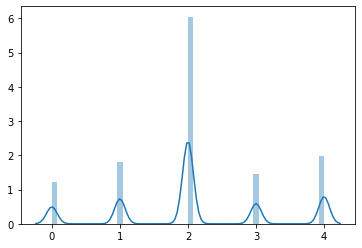

In [20]:
# Start pulling the arm
for i in range(no_of_iterations):
    # Select the arm using epsilon greedy
    banner = epsilon_greedy(0.5)
    # Get the rewards
    reward = df.values[i,banner]
    # Update the count of that arm
    count[banner] +=1 
    #Sum the rewards obtained from that arm
    sum_rewards[banner] +=reward
    #Calculate the Q value which is the average rewards of the arm
    Q[banner] = sum_rewards[banner]/count[banner]
    banner_selected.append(banner)
sns.distplot(banner_selected)